In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('house_pred.csv')

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df1=df.drop(['availability','society','bath','balcony','area_type'],axis='columns')

In [5]:
df1

,location,size,total_sqft,price
0,Electronic City Phase II,2 BHK,1056,39.07
1,Chikka Tirupathi,4 Bedroom,2600,120.00
2,Uttarahalli,3 BHK,1440,62.00
3,Lingadheeranahalli,3 BHK,1521,95.00
4,Kothanur,2 BHK,1200,51.00
...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,231.00
13316,Richards Town,4 BHK,3600,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,60.00
13318,Padmanabhanagar,4 BHK,4689,488.00


In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
price          0
dtype: int64

In [7]:
df2=df1.dropna()

In [8]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
price         0
dtype: int64

In [9]:
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\as361\AppData\Local\Temp\ipykernel_4880\3716419620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))


In [10]:
df2.head()

,location,size,total_sqft,price,bhk
0,Electronic City Phase II,2 BHK,1056,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,120.00,4
2,Uttarahalli,3 BHK,1440,62.00,3
3,Lingadheeranahalli,3 BHK,1521,95.00,3
4,Kothanur,2 BHK,1200,51.00,2


In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [12]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,224.500,4
122,Hebbal,4 BHK,3067 - 8156,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,43.490,2
188,KR Puram,2 BHK,1015 - 1540,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,63.770,2


In [13]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
df2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)

C:\Users\as361\AppData\Local\Temp\ipykernel_4880\995833837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)


In [15]:
df2.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
price            18.5
bhk                 1
Name: 410, dtype: object

In [16]:
len(df2.location.unique())

1304

In [17]:
df2.location=df2.location.apply(lambda x: x.strip())
location_stats=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

C:\Users\as361\AppData\Local\Temp\ipykernel_4880\1600178675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.location=df2.location.apply(lambda x: x.strip())


location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [18]:
length_lessthan_10=location_stats[location_stats<=10]
length_lessthan_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [19]:
df2.location=df2.location.apply(lambda x:'other' if x in length_lessthan_10 else x)

C:\Users\as361\AppData\Local\Temp\ipykernel_4880\142008794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.location=df2.location.apply(lambda x:'other' if x in length_lessthan_10 else x)


In [20]:
len(df2.location.unique())

242

In [21]:
df2

,location,size,total_sqft,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,95.00,3
4,Kothanur,2 BHK,1200.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,231.00,5
13316,other,4 BHK,3600.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,488.00,4


In [22]:
df2['price_persqft']=df2['price']*100000/df2['total_sqft']

C:\Users\as361\AppData\Local\Temp\ipykernel_4880\335537438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_persqft']=df2['price']*100000/df2['total_sqft']


In [23]:
df2

,location,size,total_sqft,price,bhk,price_persqft
0,Electronic City Phase II,2 BHK,1056.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,488.00,4,10407.336319


In [24]:
df2.shape

(13303, 6)

In [25]:
df3=df2[~(df2.total_sqft/df2.bhk<300)]

In [26]:
df3.shape

(12559, 6)

In [27]:
df3.price_persqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_persqft, dtype: float64

In [28]:
import numpy as np
def remove_outliars(df):
    df_out=pd.DataFrame()
    for key,sub_df in df.groupby('location'):
        m=np.mean(sub_df.price_persqft)
        st=np.std(sub_df.price_persqft)
        reduced_df=sub_df[(sub_df.price_persqft>(m-st))&(sub_df.price_persqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [29]:
df4=remove_outliars(df3)

In [30]:
df4.shape

(10286, 6)

In [31]:
df4.isnull().sum()

location         0
size             0
total_sqft       0
price            0
bhk              0
price_persqft    0
dtype: int64

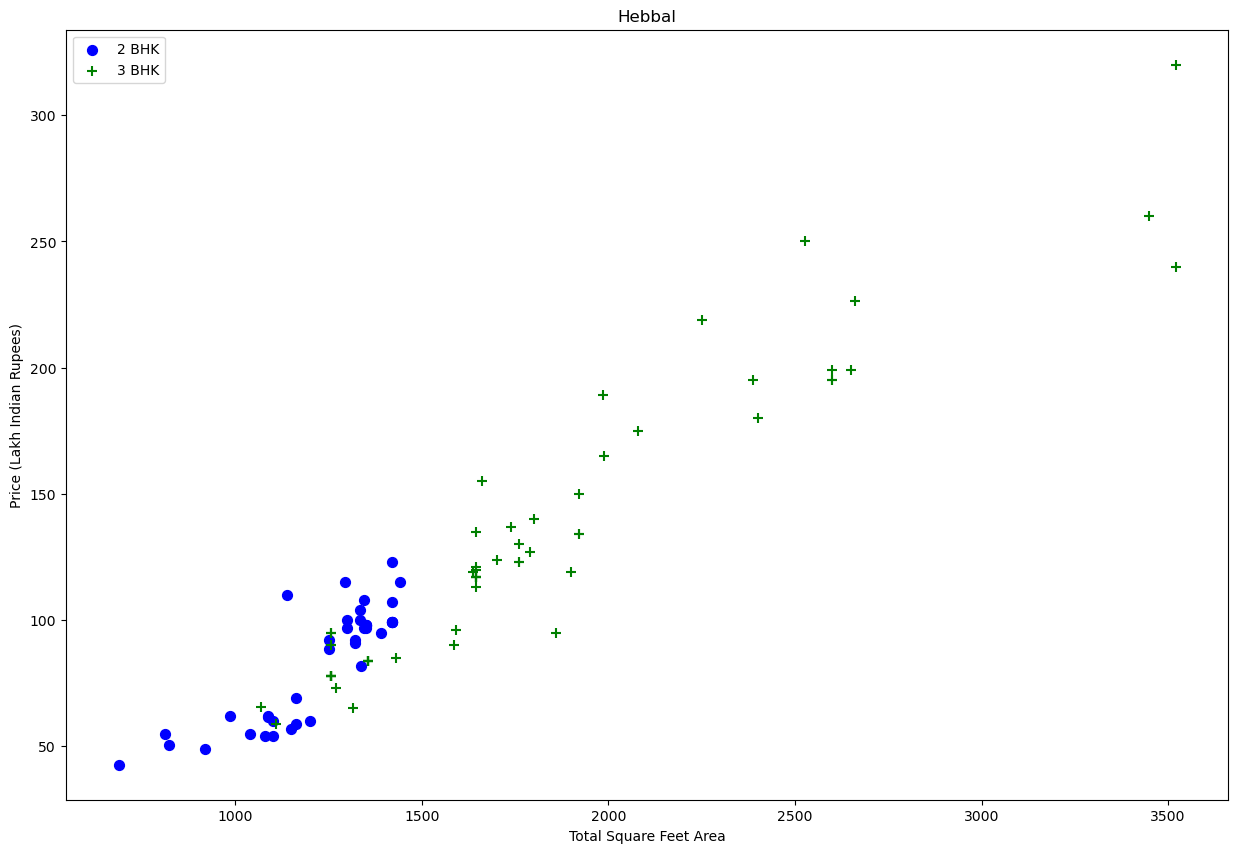

In [32]:
import matplotlib
from matplotlib import pyplot as plt
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Hebbal")

In [33]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_persqft),
                'std': np.std(bhk_df.price_persqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_persqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(7353, 6)

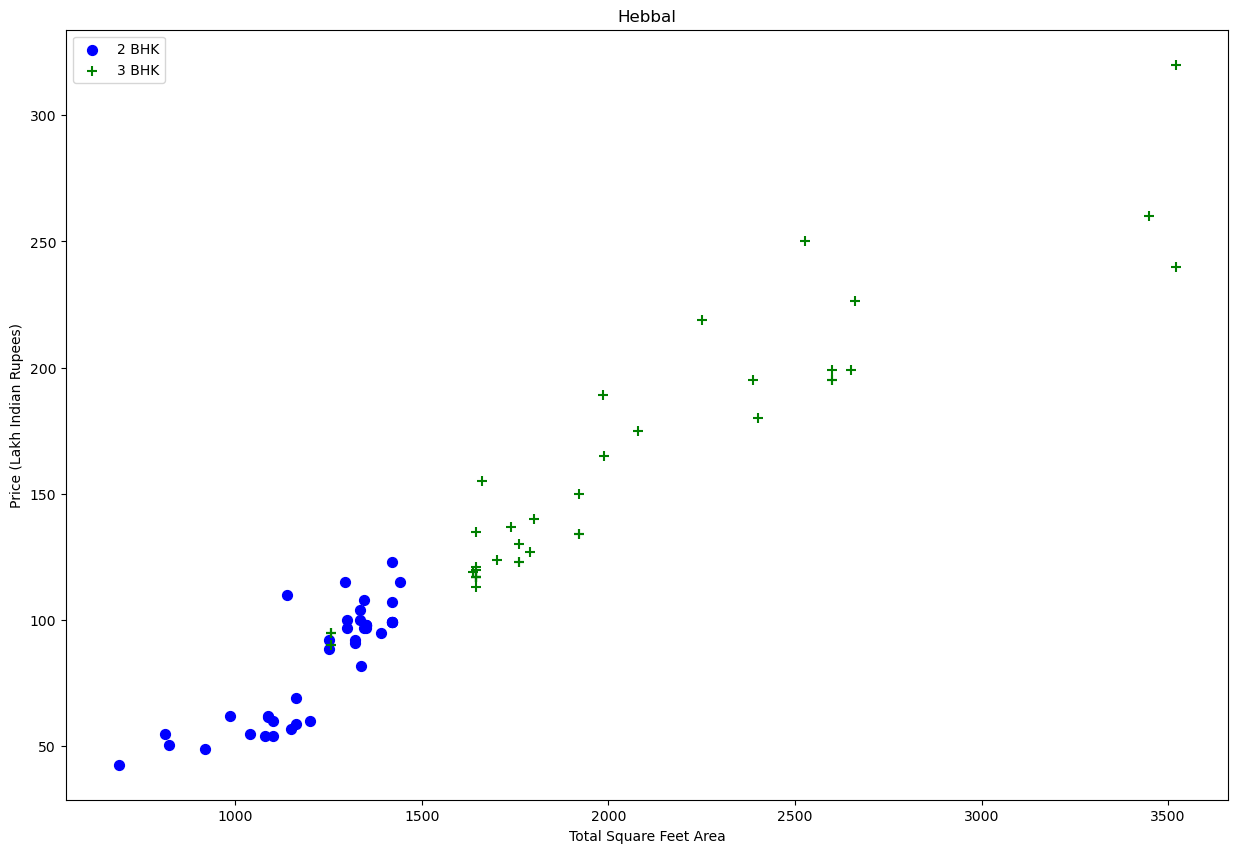

In [34]:
plot_scatter_chart(df5,"Hebbal")

In [35]:
df5

,location,size,total_sqft,price,bhk,price_persqft
0,1st Block Jayanagar,4 BHK,2850.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10277,other,2 BHK,1200.0,70.0,2,5833.333333
10278,other,1 BHK,1800.0,200.0,1,11111.111111
10281,other,2 BHK,1353.0,110.0,2,8130.081301
10282,other,1 Bedroom,812.0,26.0,1,3201.970443


In [36]:
df6=df5.drop(['size','price_persqft'],axis='columns')
df6

,location,total_sqft,price,bhk
0,1st Block Jayanagar,2850.0,428.0,4
1,1st Block Jayanagar,1630.0,194.0,3
2,1st Block Jayanagar,1875.0,235.0,3
3,1st Block Jayanagar,1200.0,130.0,3
4,1st Block Jayanagar,1235.0,148.0,2
...,...,...,...,...
10277,other,1200.0,70.0,2
10278,other,1800.0,200.0,1
10281,other,1353.0,110.0,2
10282,other,812.0,26.0,1


In [37]:
df7=pd.get_dummies(df6.location)
df7=df7.drop(['other'],axis='columns')
df7

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10282,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:

df8=pd.concat([df6,df7],axis='columns')

In [39]:
df8=df8.drop(['location'],axis='columns')

In [40]:
x=df8.drop(['price'],axis='columns')

In [41]:
y=df8.price

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [45]:
model.score(x_test,y_test)

0.8241751605589914

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
cv = ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.86639377, 0.88276712, 0.80924687, 0.84669689, 0.84723056])

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
def find_the_best(x,y):
    algos = {
       'linear_regression': {
        'model': LinearRegression(),
        'params' : {
            'fit_intercept' : [True,False],
             'copy_X' : [True,False],
            'positive' : [True,False]
        }  
      },
       'lasso': {
        'model': Lasso(),
        'params' : {
            'alpha': [1,2],
            'selection':['random','cyclic']
        }
      },
      'decision_tree' : {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse','friedman_mse'],
            'splitter':['best','random']
        }
    }
   }
    scores = []
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name, mp in algos.items():
        clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
        clf.fit(x,y)
        scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
         })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_the_best(x,y)

D:\hunter\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\hunter\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\hunter\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\hunter\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\hunter\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constra

,model,best_score,best_params
0,linear_regression,0.847488,"{'copy_X': True, 'fit_intercept': False, 'posi..."
1,lasso,0.715520,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.648506,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
